In [69]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import accuracy_score


Dataset breast cancer Wisconsin: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2

**PREGUNTA**

1. Lee el dataset data.csv. Elimina las características "id" y "Unnamed: 32"
2. Construye ***X*** con todas las característicase menos "diagnosis" e ***y*** con "diagnosis", reemplazando M por 1 y B por 0 en "diagonosis"

In [70]:
# Leo el dataset
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [71]:
#Elimino las columnas id y Unnamed: 32
df = df.drop (['id', 'Unnamed: 32'], axis= 1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [72]:
# Quitamos diagnosis del dataset y esta será nuestra X
X = df.drop("diagnosis", axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
# Creamos la "y" en "diagnosis" reemplazando M por 1 y B por 0
y = df["diagnosis"].map({'M': 1, 'B': 0})
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

**PREGUNTA**
3. Normaliza X con StandardScaler -> X_std
4. Crea X_pca usando PCA a partir del X_std con 2 componentes principales
5. Crea X_tsne usando TSNE a partir del X_std  con 2 componentes principales

In [74]:
 #Normaliza X con StandardScaler -> X_std:

# Creo el objeto StandardScaler y normalizo la matrix X
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [75]:
# Crea X_pca usando PCA a partir del X_std con 2 componentes principales

# Primero creo el objeto PCA con 2 componentes principales:
pca = PCA(n_components= 2)

# Aplico PCA a la matriz normalizada X_std
X_pca = pca.fit_transform(X_std)


In [76]:
# Crea X_tsne usando TSNE a partir del X_std con 2 componentes principales:

# Primero creo el objeto TSNE con 2 componentes principales:
tsne = TSNE(n_components= 2, random_state= 42)

#Aplico tsne a la matriz normalizada (X_std)
X_tsne = tsne.fit_transform(X_std)


**PREGUNTA**
6. Crea un scatterplot con las dos componentes principales de PCA (color = y)
7. Crea un scatterplot con las dos componentes principales de TSNE

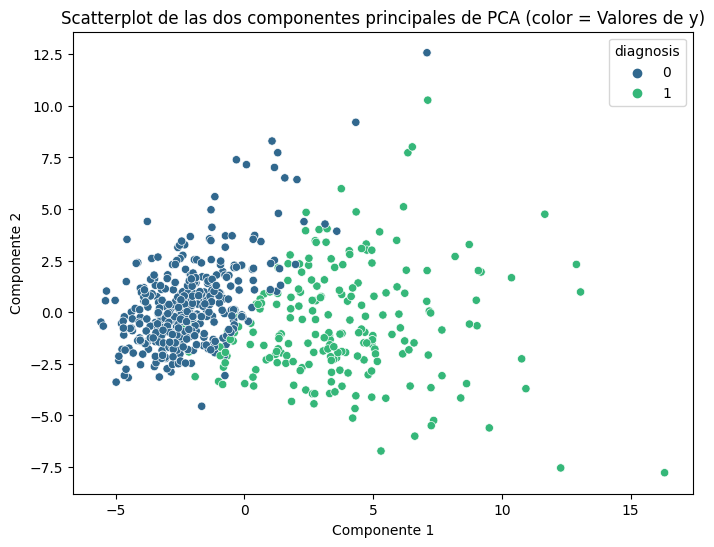

In [77]:
#Crea un scatterplot con las dos componentes principales de PCA (color = y)

#Primero voy a crear un dataframe con los datos:
df_X_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_X_pca

#Agrego las dos componentes principales al DataFrame df_X_pca
df_X_pca['diagnosis'] = y

#Creo el scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='diagnosis', data=df_X_pca, palette='viridis')

# Agregar etiquetas y título
plt.title('Scatterplot de las dos componentes principales de PCA (color = Valores de y)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

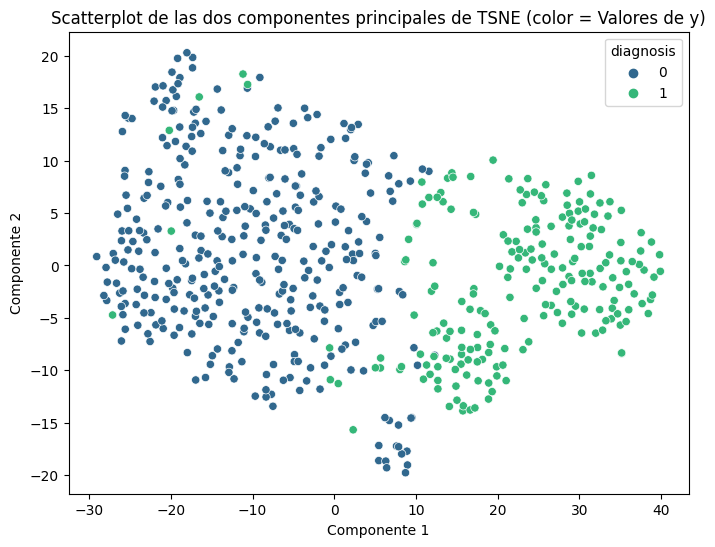

In [78]:
#Crea un scatterplot con las dos componentes principales de TSNE:

#Primero voy a crear un dataframe con los datos:
df_X_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
df_X_tsne
# Agrego las dos componentes principales al DataFrame df_X_tsne
df_X_tsne['diagnosis'] = y

# Crear un scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='diagnosis', data=df_X_tsne, palette='viridis')

# Agregar etiquetas y título
plt.title('Scatterplot de las dos componentes principales de TSNE (color = Valores de y)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


**PREGUNTA**

8. Crea un modelo K-means con 2 clusters sobre X_pca y calcula la exactitud del mismo(accuracy_score). ¿Tiene mayor exactitud con X_tsne?

In [79]:
# La idea es agrupar los datos en dos cluster y calcular la excatitud (accuracy)
# del modelo con las componentes de X_pca.

#2 clusters sobre X_pca
kmeans_pca = KMeans(n_clusters=2, random_state=42)
y_pred_pca = kmeans_pca.fit_predict(X_pca)
# Calcular la exactitud para X_pca
accuracy_pca = accuracy_score(y, y_pred_pca)
print(f'Exactitud con X_pca: {accuracy_pca:.4f}')

#2 clusters sobre X_tsne
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
y_pred_tsne = kmeans_tsne.fit_predict(X_tsne)
# Calcular la exactitud para X_tsne
accuracy_tsne = accuracy_score(y, y_pred_tsne)
print(f'Exactitud con X_tsne: {accuracy_tsne:.4f}')



Exactitud con X_pca: 0.9069
Exactitud con X_tsne: 0.9192


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Basándonos en los resultados obtenidos tiene una mayor exactitud cuando se aplica sobre las componentes principales de TSNE (X_tsne) en comparación con las componentes principales de PCA (X_pca). La exactitud con X_tsne es del 91.92%, mientras que la exactitud con X_pca es del 90.69%.

**PREGUNTA**

9. Mustra el gráfico de inercias para X_tsne e identifica el codo para K óptimo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

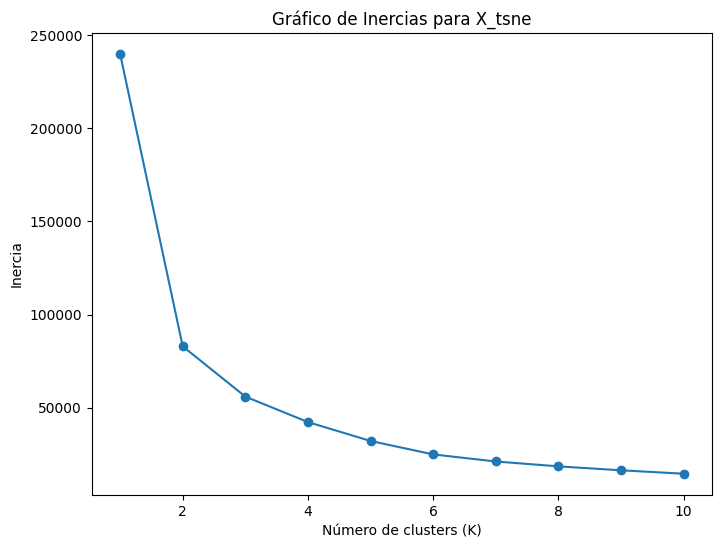

In [80]:
#La inercia es la suma de las distancias al cuadrado entre cada punto de datos y
#el centroide de su respectivo cluster.

# Primero creo una lista para almacenar las inercias:
inercias = []

#Probar diferentes valores de K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tsne)
    inercias.append(kmeans.inertia_)

# Por ultimop creo el gráfico de inercias
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inercias, marker='o')
plt.title('Gráfico de Inercias para X_tsne')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.show()


El punto optimo de cluster será donde la disminución de la inercia se aplana o forma un codo. En nuestro caso, podría ser (2,80000) o (3,60000); depediendo del objetivo especifico que se pretenda analizar

**PREGUNTA**

10. Calcula el K óptimo usando el análisis de silueta (Silhouette analysis). Muestra también los gráficos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


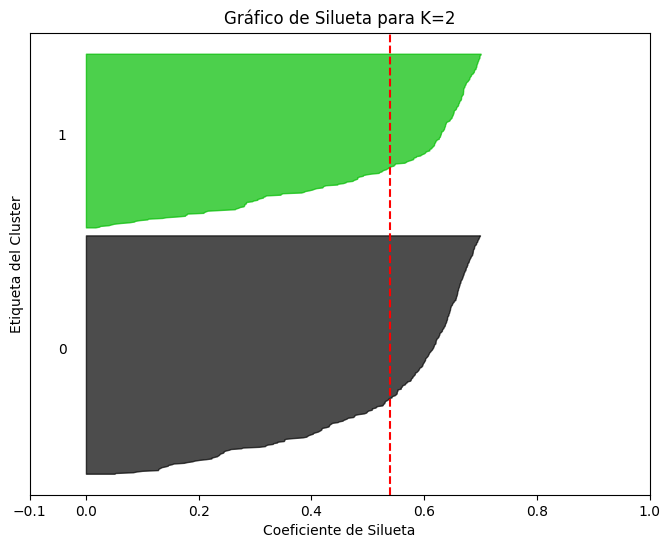

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


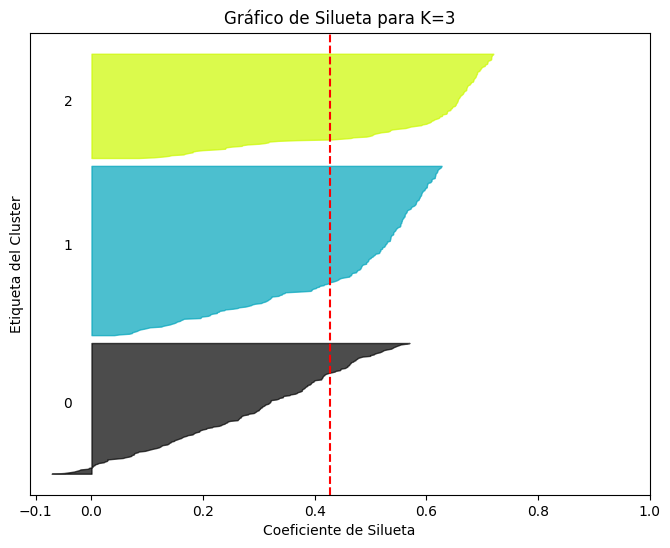

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


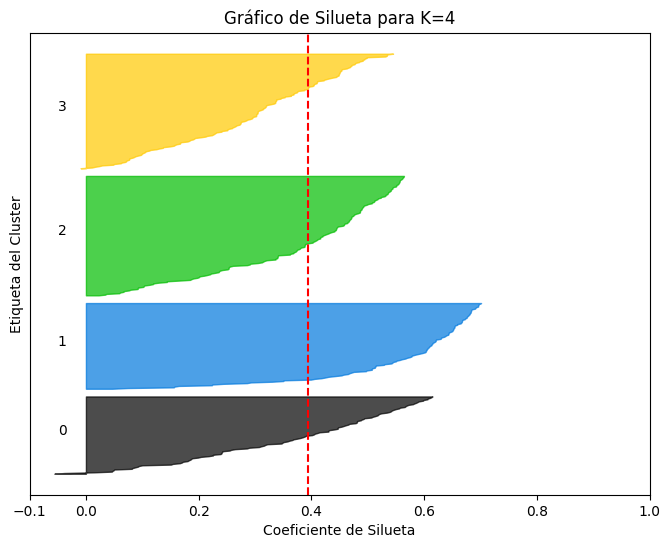

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


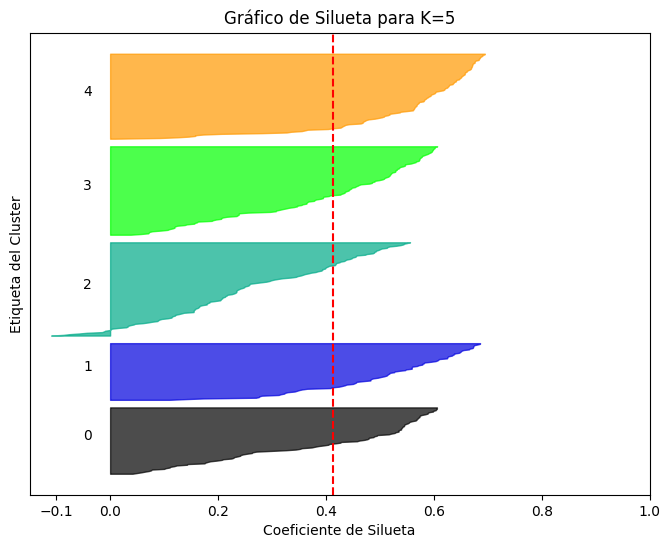

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


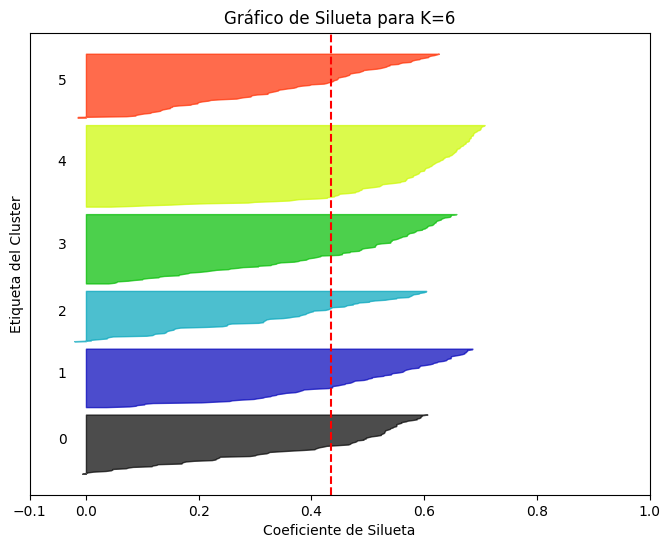

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


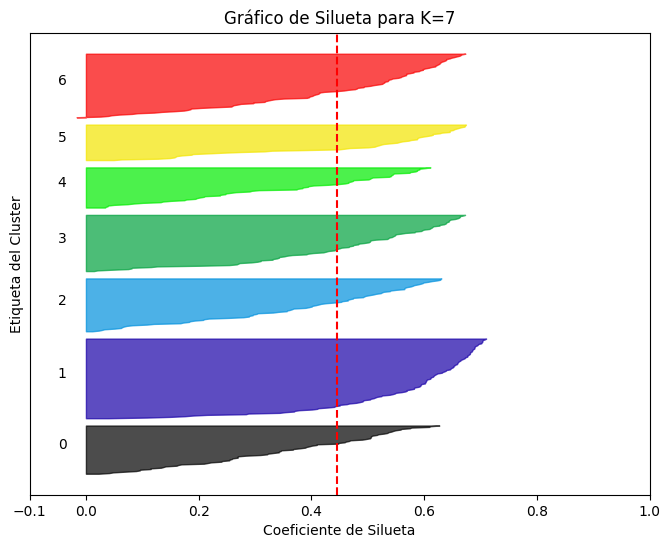

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


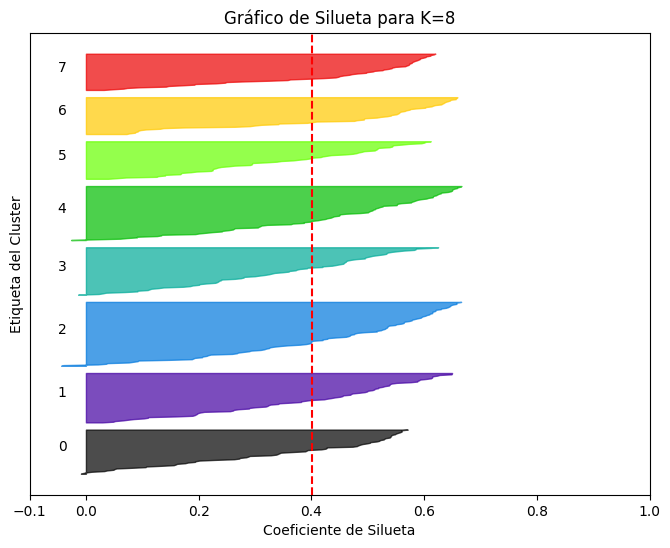

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


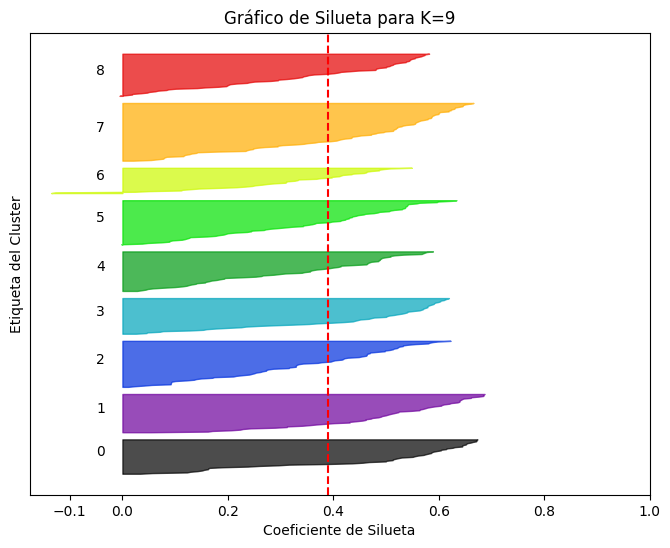

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


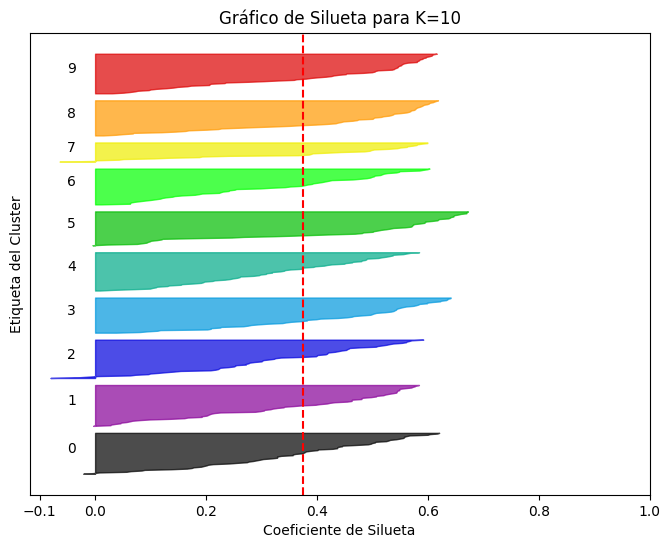

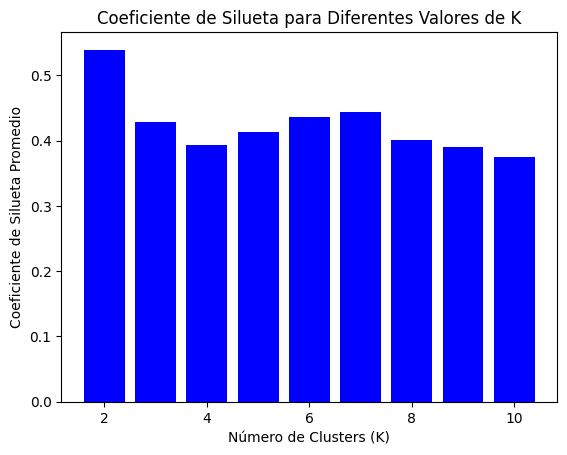

Número óptimo de clusters (basado en Silhouette analysis) es: 2


In [81]:
# Calcula el K optimo usando silueta y muestra los graficos (en un rango (2;10)) y
# tambien he hecho un gráfico de barras para la media del coeficiente de silueta.
# Por ultimo, he calculado K optimo basado en el mayor coeficiente de silueta.

# Lista para almacenar los coeficientes de silueta
silhouette_avg_list = []

# Rango de valores de K a probar
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Calcular coeficientes de silueta para diferentes valores de K
for n_clusters in range_n_clusters:
    # Crear el objeto KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_tsne)

# Calcular el coeficiente de silueta para el modelo KMeans
    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)

# Calcular los coeficientes de silueta para cada punto de datos
    sample_silhouette_values = silhouette_samples(X_tsne, cluster_labels)

# Crear un gráfico de silueta
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
# Tamaño:
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
#Color:
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
# Agrego un tezxto al grafico de silueta con el numero de cluster y actulizo para el siguiente cluster
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f'Gráfico de Silueta para K={n_clusters}')
    ax.set_xlabel('Coeficiente de Silueta')
    ax.set_ylabel('Etiqueta del Cluster')

# La línea vertical va a ser discontinua para el coeficiente de silueta promedio de todos los valores
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
# Elimino las marcas (ticks) del eje y, despues establezco las marcas del eje x
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

# Creo un gráfico de barras para la media del coeficiente de silueta
plt.bar(range_n_clusters, silhouette_avg_list, color='blue')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta Promedio')
plt.title('Coeficiente de Silueta para Diferentes Valores de K')
plt.show()

# K óptimo basado en el mayor coeficiente de silueta
k_optimo = range_n_clusters[np.argmax(silhouette_avg_list)]
print(f'Número óptimo de clusters (basado en Silhouette analysis) es: {k_optimo}')
